**Anandha Krishnan H**    *anandha.mi3@iiitmk.ac.in*



---



This work has been done as part of the Lab Exam for Big Data Course

We are working with a supermarket dataset where we have to predict whether a person will pay the next EMI or not (come?)
As part of the test we are required to load the dataset into cassandra and use pyspark for the ML tasks


First of all we need to upload the file into the remote system we are working on. Due to the lack of any GUI in the remote system we will be using FTP commands to establish a connection with the remote machine and send the files



```
ftp anandhami30@192.168.1.20
```

After which we continue to give the log in credentials. 
Now we change into the directory where the file is

```
ftp> cd /home/anandhami30/

```
Ensure that the target directory


```
ftp> ls -l /home/anandhami30/
```

Set the transfer type to binary
```
ftp> binary
```
Transfer the file 


```
ftp> put /home/Downloads/supermarket.csv
```
Finally close the FTP connection 



```
ftp> bye
```











Now that file has been loaded into our remote machine we need to upload it into Cassandra

Next we KeySpace 
```
>CREATE KEYSPACE supermarket WITH replication = {'class': 'SimpleStrategy', 'replication_factor': 1};
>use supermarket;
```
Next we create a table where the data will be stored 
```
>CREATE TABLE movies(IDCustomer INT PRIMARY KEY,Balance INT,Gender VARCHAR,EDUCATION_Level INT,Married_or_Not INT,Age INT,Pay_Month1 INT,Pay_Month2 INT,Pay_Month3 INT,Pay_month4 INT,Pay_month6 INT,Pay_month7 INT,Amount1 INT,Amount2 INT,Amount3 INT,Amount4 INT,Amount5 INT,Amount6 INT,PAY_AMT1 INT,PAY_AMT2 INT,PAY_AMT3 INT,PAY_AMT4 INT,PAY_AMT5 INT,PAY_AMT6 INT,Come INT);
```
Next we need to copy the contends of the document into the table. Note that do not mention the data type of the columns

```
COPY supermarket(IDCustomer ,Balance ,Gender ,EDUCATION_Level ,Married_or_Not ,Age ,Pay_Month1 ,Pay_Month2 ,Pay_Month3 ,Pay_month4 ,Pay_month6 ,Pay_month7 ,Amount1 ,Amount2 ,Amount3 ,Amount4 ,Amount5 ,Amount6 ,PAY_AMT1 ,PAY_AMT2 ,PAY_AMT3 ,PAY_AMT4 ,PAY_AMT5 ,PAY_AMT6 ,Come ) FROM '/home/anandhami30/supermarket.csv' WITH HEADER = true;
```
The rest are done on a jupyter notebook

In [0]:
#Set up the environment
import os
import cassandra
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.datastax.spark:spark-cassandra-connector_2.11:2.3.0 --conf spark.cassandra.connection.host=192.168.0.123,192.168.0.124 pyspark-shell'

In [0]:
#Connect to the Cassandra cluster
from cassandra.cluster import Cluster
cluster = Cluster(['127.0.0.1']) 
session = cluster.connect()

In [0]:
#Initialize the spark session
from pyspark.sql import SparkSession
from pyspark import SparkContext
SpSession = SparkSession \
    .builder \
    .master("local[2]") \
    .appName("iiitmk") \
    .config("spark.executor.memory", "10g") \
    .config("spark.cores.max","24") \
    .config("spark.sql.warehouse.dir", "/tmp/spark")\
    .getOrCreate()
    

In [0]:
#import pandas and add the dataframe
import pandas as pd
query = "SELECT * from anandha.supermarket;"
df = pd.DataFrame(list(session.execute(query)))

In [0]:
#Data cleaning by making the different gender classes consistent from M,F,1,2 into 1 and 2 
preproc=list(df['gender'])
for i,j in enumerate(preproc):
    if(j=='M'):
        preproc[i]=1
    elif(j=='F'):
        preproc[i]=2
    elif(j=='1'):
        preproc[i]=1
    elif(j=='2'):
        preproc[i]=2
df['gender']=preproc

In [0]:
#Create the pyspark dataframe
data = spark.createDataFrame(df)

In [0]:
data.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+-----------------+----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+----------------+------------------+------------------+
|summary|        idcustomer|              age|          amount1|          amount2|          amount3|         amount4|          amount5|          amount6|           balance|               come|   education_level|            gender|    married_or_not|          pay_amt1|          pay_amt2|          pay_amt3|          pay_amt4|         pay_amt5|          pay_amt6|        pay_month1|        pay_month2|        pay_month3|      pay_month4|        pay_month6|        pay_month7|
+-------+------------------+-----------------+----

In [19]:
df.describe()

IDCustomer        Balance  ...        Come?       gender
count  1000.000000    1000.000000  ...  1000.000000  1000.000000
mean    500.500000  167080.000000  ...     0.403000     1.591000
std     288.819436  130632.838668  ...     0.490746     0.491895
min       1.000000   10000.000000  ...     0.000000     1.000000
25%     250.750000   50000.000000  ...     0.000000     1.000000
50%     500.500000  140000.000000  ...     0.000000     2.000000
75%     750.250000  240000.000000  ...     1.000000     2.000000
max    1000.000000  700000.000000  ...     1.000000     2.000000

[8 rows x 25 columns]

In [0]:
df['age'].describe()

count    1000.00000
mean       34.93800
std         9.22818
min        21.00000
25%        28.00000
50%        33.00000
75%        41.00000
max        75.00000
Name: age, dtype: float64

#Visualizations

In [152]:
data.iloc[0:0]

Empty DataFrame
Columns: [IDCustomer, Balance, Gender(1/2), EDUCATION Level, Married or Not, Age, Pay Month1, Pay Month2, Pay  Month3, Pay month4, Pay month6, Pay month7, Amount 1, Amount 2, Amount 3, Amount 4, Amount 5, Amount 6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, Come?]
Index: []

Text(0, 0.5, 'Gender(1/2)')

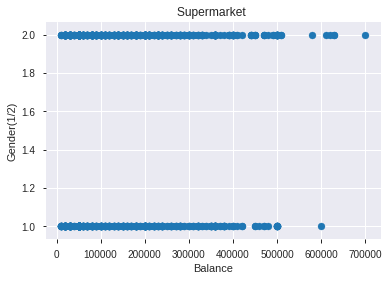

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(data['Balance'], data['Gender(1/2)'])
# set a title and labels
ax.set_title('Supermarket ')
ax.set_xlabel('Balance')
ax.set_ylabel('Gender(1/2)')

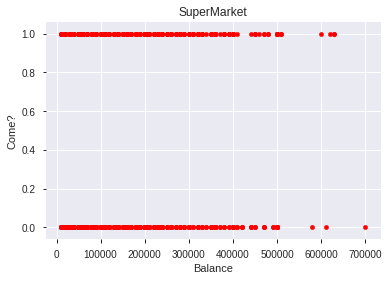

In [183]:
data.plot.scatter(x='Balance', y='Come?', title='SuperMarket',color='red')


No handles with labels found to put in legend.


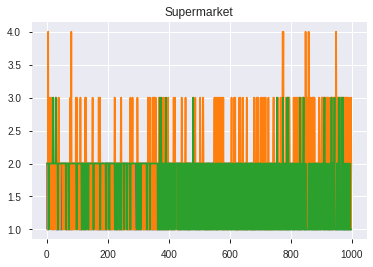

In [180]:
# get columns to plot
columns = data.columns.drop(['IDCustomer','Balance','Pay Month1',	'Age','Pay Month2',	'Pay  Month3',	'Pay month4',	'Pay month6',	'Pay month7'	,'Amount 1',	'Amount 2',	'Amount 3',	'Amount 4',	'Amount 5',	'Amount 6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6','Come?'])
# create x data
x_data = range(0, data.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data[column])
# set title and legend
ax.set_title('Supermarket')
ax.legend()

Text(0, 0.5, 'Come?')

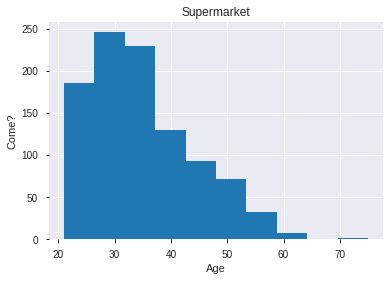

In [162]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['Age'])
# set title and labels
ax.set_title('Supermarket')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

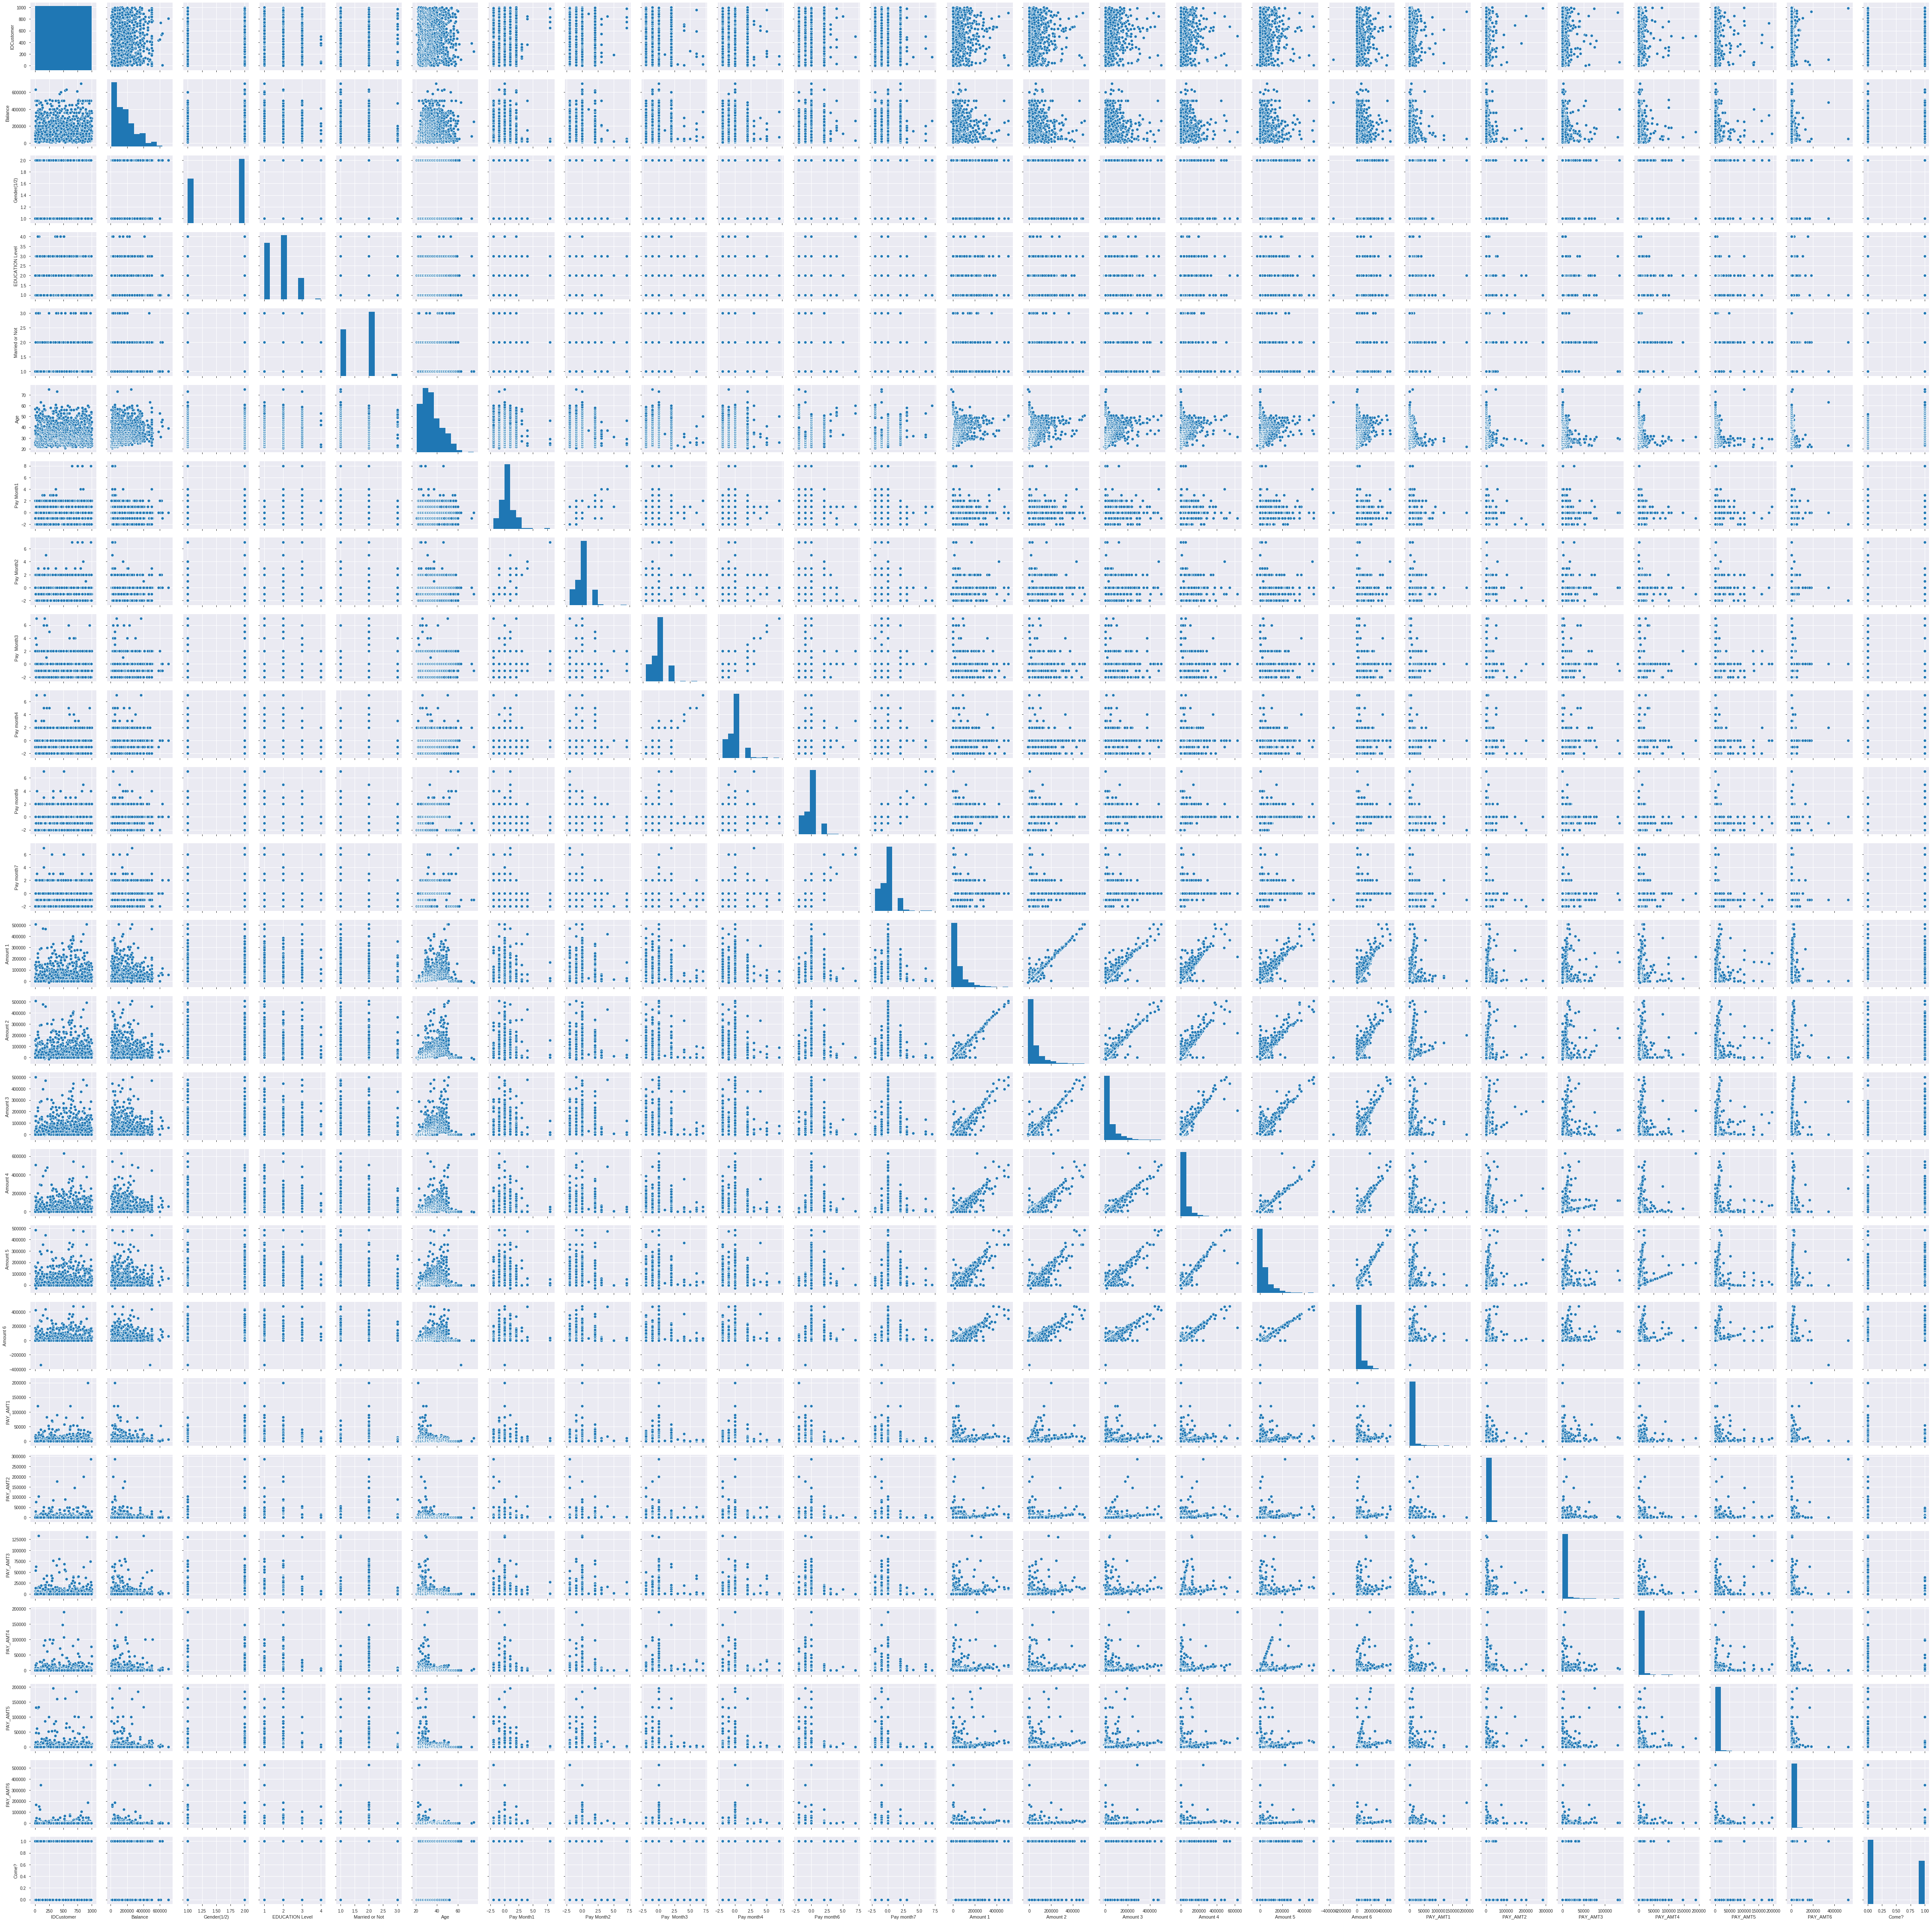

In [176]:
import seaborn as sns
sns.pairplot(data)


Correlation Matrix

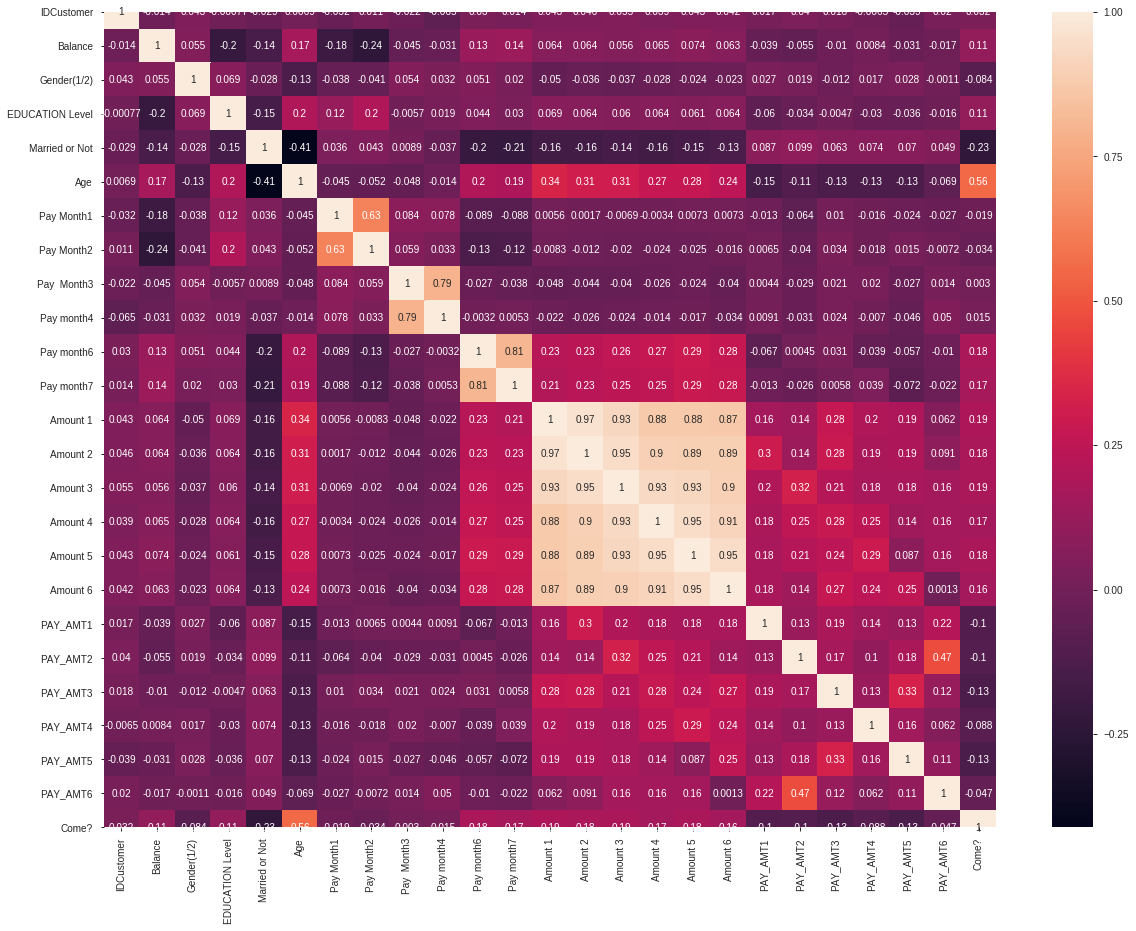

In [175]:
import seaborn as sns
plt.subplots(figsize=(20,15))

sns.heatmap(data.corr(), annot=True)


In [0]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(data)
print(profile)


In [0]:
#Finding the correlation of come? with other columns
for i in data.columns:
    if not( isinstance(data.select(i).take(1)[0][0], str)) :
        print( "Correlation to come? for ", i, \
                    data.stat.corr('come',i))

Correlation to come? for  idcustomer 0.03177012154590983
Correlation to come? for  age 0.55766877399819
Correlation to come? for  amount1 0.19397728785929416
Correlation to come? for  amount2 0.1847313764702889
Correlation to come? for  amount3 0.18573902813529147
Correlation to come? for  amount4 0.16629648029698024
Correlation to come? for  amount5 0.18145775224535793
Correlation to come? for  amount6 0.16109270166642026
Correlation to come? for  balance 0.10722031324020789
Correlation to come? for  come 1.0
Correlation to come? for  education_level 0.11056265057032866
Correlation to come? for  gender -0.08365182215019258
Correlation to come? for  married_or_not -0.22891287287359363
Correlation to come? for  pay_amt1 -0.1028630569856456
Correlation to come? for  pay_amt2 -0.10031191745853547
Correlation to come? for  pay_amt3 -0.12592659108643178
Correlation to come? for  pay_amt4 -0.08785502164109758
Correlation to come? for  pay_amt5 -0.13416792368475747
Correlation to come? for  p

In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['IDCustomer','Balance','Gender(1/2)','EDUCATION Level',	'Married or Not',	'Age'	,'Pay Month1',	'Pay Month2',	'Pay  Month3',	'Pay month4',	'Pay month6',	'Pay month7'	,'Amount 1',	'Amount 2',	'Amount 3',	'Amount 4',	'Amount 5',	'Amount 6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6'], outputCol = 'Attributes')
output = assembler.transform(df)
#Input vs Output
finalized_data = output.select("Attributes","Come?")
finalized_data.show()


+--------------------+-----+
|          Attributes|Come?|
+--------------------+-----+
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|[47.0,20000.0,2.0...|    0|
|[70.0,20000.0,1.0...|    0|
|[79.0,30000.0,2.0...|    0|
|(24,[0,1,2,3,4,5,...|    0|
|[104.0,50000.0,2....|    0|
|[135.0,30000.0,2....|    0|
|[170.0,50000.0,2....|    0|
|[173.0,50000.0,2....|    0|
|(24,[0,1,2,3,4,5,...|    0|
|[198.0,20000.0,2....|    0|
|[200.0,30000.0,2....|    0|
|[292.0,50000.0,2....|    0|
|[398.0,50000.0,2....|    0|
|[519.0,10000.0,2....|    0|
|(24,[0,1,2,3,4,5,...|    0|
|[664.0,50000.0,1....|    0|
|(24,[0,1,2,3,4,5,...|    0|
+--------------------+-----+
only showing top 20 rows



In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

In [0]:
#Summary of the numeric variables
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

0     1       2    3    4
summary  count  mean  stddev  min  max

In [0]:
df = df.select('IDCustomer','Balance','Gender(1/2)','EDUCATION Level','Age'	,'Pay Month1',	'Pay Month2',	'Pay  Month3',	'Pay month4',	'Pay month6',	'Pay month7'	,'Amount 1',	'Amount 2',	'Amount 3',	'Amount 4',	'Amount 5',	'Amount 6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6','Come?')
cols = df.columns
df.printSchema()

root
 |-- IDCustomer: long (nullable = true)
 |-- Balance: long (nullable = true)
 |-- Gender(1/2): long (nullable = true)
 |-- EDUCATION Level: long (nullable = true)
 |-- Married or Not: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Pay Month1: long (nullable = true)
 |-- Pay Month2: long (nullable = true)
 |-- Pay  Month3: long (nullable = true)
 |-- Pay month4: long (nullable = true)
 |-- Pay month6: long (nullable = true)
 |-- Pay month7: long (nullable = true)
 |-- Amount 1: long (nullable = true)
 |-- Amount 2: long (nullable = true)
 |-- Amount 3: long (nullable = true)
 |-- Amount 4: long (nullable = true)
 |-- Amount 5: long (nullable = true)
 |-- Amount 6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: long (nullable = true)
 |-- Come?: long (nullable = true)



#Data Preparation

Now we need to prepare the data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

It indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices. Next, we use the VectorAssembler to combine all the feature columns into a single vector column.

In [0]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['Gender(1/2)','EDUCATION Level',	'Married or Not']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Come?', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['IDCustomer','Balance',	'Age'	,'Pay Month1',	'Pay Month2',	'Pay  Month3',	'Pay month4',	'Pay month6',	'Pay month7'	,'Amount 1',	'Amount 2',	'Amount 3',	'Amount 4',	'Amount 5',	'Amount 6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- IDCustomer: long (nullable = true)
 |-- Balance: long (nullable = true)
 |-- Gender(1/2): long (nullable = true)
 |-- EDUCATION Level: long (nullable = true)
 |-- Married or Not: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Pay Month1: long (nullable = true)
 |-- Pay Month2: long (nullable = true)
 |-- Pay  Month3: long (nullable = true)
 |-- Pay month4: long (nullable = true)
 |-- Pay month6: long (nullable = true)
 |-- Pay month7: long (nullable = true)
 |-- Amount 1: long (nullable = true)
 |-- Amount 2: long (nullable = true)
 |-- Amount 3: long (nullable = true)
 |-- Amount 4: long (nullable = true)
 |-- Amount 5: long (nullable = true)
 |-- Amount 6: long (nullable = true)
 |-- PAY_AMT1: long (nullable = true)
 |-- PAY_AMT2: long (nullable = true)
 |-- PAY_AMT3: long (nullable = true)
 |-- PAY_AMT4: long (nullable = true)
 |-- PAY_AMT5: long (nullable = true)
 |-- PAY_AMT6: lon

Randomly split data into train and test sets, and set seed for reproducibility.


In [0]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 684
Test Dataset Count: 316


#Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

We can obtain the coefficients by using LogisticRegressionModel’s attributes.

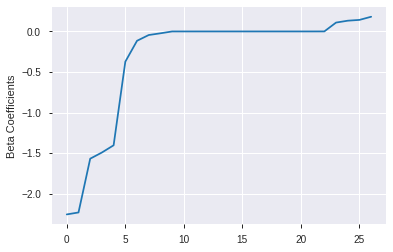

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.

In [128]:
display(lr, data);


LogisticRegression_39cb66dddae1

DataFrame[IDCustomer: bigint, Balance: bigint, Gender(1/2): bigint, EDUCATION Level: bigint, Married or Not: bigint, Age: bigint, Pay Month1: bigint, Pay Month2: bigint, Pay  Month3: bigint, Pay month4: bigint, Pay month6: bigint, Pay month7: bigint, Amount 1: bigint, Amount 2: bigint, Amount 3: bigint, Amount 4: bigint, Amount 5: bigint, Amount 6: bigint, PAY_AMT1: bigint, PAY_AMT2: bigint, PAY_AMT3: bigint, PAY_AMT4: bigint, PAY_AMT5: bigint, PAY_AMT6: bigint, Come?: bigint]

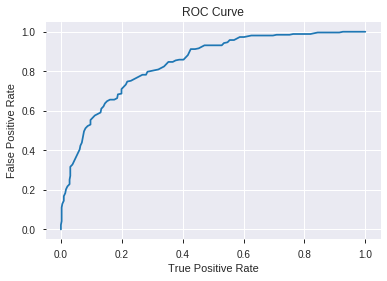

Training set areaUnderROC: 0.8406081545530194


In [0]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Precision and recall.

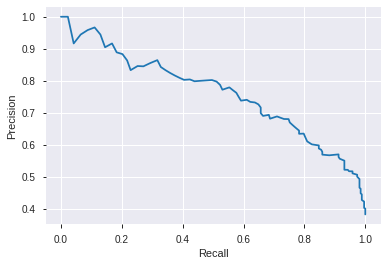

In [0]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Make predictions on the test set.


In [0]:
predictions = lrModel.transform(test)
predictions.select('age', 'Gender(1/2)', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|Gender(1/2)|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 23|          2|  0.0|[2.13802259720440...|       0.0|[0.89454421794055...|
| 29|          2|  0.0|[0.84655076977084...|       0.0|[0.69984308753229...|
| 22|          2|  0.0|[0.43624714394831...|       0.0|[0.60736443786734...|
| 25|          2|  0.0|[2.20266923993925...|       0.0|[0.90048895355153...|
| 25|          2|  0.0|[1.72302891116477...|       0.0|[0.84851856797281...|
| 25|          2|  0.0|[2.13059017140068...|       0.0|[0.89384102226382...|
| 24|          2|  0.0|[2.44515872231558...|       0.0|[0.92020669593409...|
| 28|          2|  0.0|[1.59293780644563...|       0.0|[0.83102903047823...|
| 22|          2|  0.0|[2.74987113667471...|       0.0|[0.93990607169673...|
| 24|          2|  0.0|[2.51436548169582...|       0.0|[0.92514277758567...|

Evaluate our Logistic Regression model.


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8116312056737586


#Decision Tree Classifier


Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions

In [141]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'Gender(1/2)', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+-------------+----------+--------------------+
|age|Gender(1/2)|label|rawPrediction|prediction|         probability|
+---+-----------+-----+-------------+----------+--------------------+
| 23|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 29|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 22|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 25|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 25|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 25|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 24|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 28|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 22|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
| 24|          2|  0.0| [225.0,18.0]|       0.0|[0.92592592592592...|
+---+-----------+-----+-------------+----------+--------------------+
only showing top 10 

Evaluate our Decision Tree model.


In [142]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7803850050658562


One simple decision tree performed poorly because it is too weak given the range of different features. The prediction accuracy of decision trees can be improved by Ensemble methods, such as Random Forest and Gradient-Boosted Tree.

#Random Forest Classifier


In [0]:
#random forest
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'Gender(1/2)', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|Gender(1/2)|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 23|          2|  0.0|[15.9262218818159...|       0.0|[0.79631109409079...|
| 29|          2|  0.0|[15.7660276877844...|       0.0|[0.78830138438922...|
| 22|          2|  0.0|[16.5123259030894...|       0.0|[0.82561629515447...|
| 25|          2|  0.0|[15.4237307643135...|       0.0|[0.77118653821567...|
| 25|          2|  0.0|[15.4385052270868...|       0.0|[0.77192526135434...|
| 25|          2|  0.0|[17.7375369488776...|       0.0|[0.88687684744388...|
| 24|          2|  0.0|[17.4873788057657...|       0.0|[0.87436894028828...|
| 28|          2|  0.0|[15.9674433892001...|       0.0|[0.79837216946000...|
| 22|          2|  0.0|[18.1157125670662...|       0.0|[0.90578562835331...|
| 24|          2|  0.0|[18.6056304589784...|       0.0|[0.93028152294892...|

Evaluate our Random Forest Classifier.


In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7986626139817631


#Gradient-Boosted Tree Classifier


In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('age', 'Gender(1/2)', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+-----------+-----+--------------------+----------+--------------------+
|age|Gender(1/2)|label|       rawPrediction|prediction|         probability|
+---+-----------+-----+--------------------+----------+--------------------+
| 23|          2|  0.0|[-1.0692461646189...|       1.0|[0.10541147816543...|
| 29|          2|  0.0|[1.10624689068331...|       0.0|[0.90136585958998...|
| 22|          2|  0.0|[1.13306731412102...|       0.0|[0.90603321759550...|
| 25|          2|  0.0|[1.02010593606421...|       0.0|[0.88495484036669...|
| 25|          2|  0.0|[0.79566166326449...|       0.0|[0.83080220438634...|
| 25|          2|  0.0|[1.33773198332134...|       0.0|[0.93556320990074...|
| 24|          2|  0.0|[1.24200781438425...|       0.0|[0.92301363145734...|
| 28|          2|  0.0|[1.11260765722342...|       0.0|[0.90249111246738...|
| 22|          2|  0.0|[1.33682414008866...|       0.0|[0.93545366520179...|
| 24|          2|  0.0|[1.33773198332134...|       0.0|[0.93556320990074...|

In [131]:
display( gbtModel)

GBTClassificationModel (uid=GBTClassifier_1f2266425887) with 10 trees

Evaluate our Gradient-Boosted Tree Classifier.


In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7540425531914896


We can use explainParams() to print a list of all params and their definitions to understand what params available for tuning.

In [0]:
print(gbt.explainParams())


cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [126]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8094022289766973

#Notes

We used different machine learning models to fit the supermarket dataset out of which all the models performed very well (ROC>~80%) 



---



The Notebook can be found on the GitHub Link: https://github.com/AKing1998/PySpark-and-Cassandra-Supermarket-dataset

This Notebook is also found as a Google Colab Notebok with link : https://drive.google.com/file/d/1VWKaP2H5W5Ylr_1nh-lh5SBtfTLXmllu/view?usp=sharing

**References**


1.   https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa
2.   https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed
3. https://medium.com/coinmonks/running-pyspark-with-cassandra-using-spark-cassandra-connector-in-jupyter-notebook-9f1dc45e8dc9

